In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
%matplotlib inline 
sns.set(style="ticks")
import seaborn as sns

In [81]:
data = pd.read_csv('Historical Presidents Physical Data (More).csv', sep=",")
data.head()

,order,name,height_cm,height_in,weight_kg,weight_lb,body_mass_index,body_mass_index_range,birth_day,birth_month,...,term_begin_year,term_begin_date,term_end_day,term_end_month,term_end_year,term_end_date,presidency_begin_age,presidency_end_age,political_party,corrected_iq
0,1,George Washington,188,74.0,79.4,175,22.5,Normal,22,2,...,1789,30-04-1789,4.0,3.0,1797.0,04-03-1797,57,65.0,Unaffiliated,140.0
1,2,John Adams,170,67.0,83.9,185,29.0,Overweight,30,10,...,1797,04-03-1797,4.0,3.0,1801.0,04-03-1801,61,65.0,Federalist,155.0
2,3,Thomas Jefferson,189,74.5,82.1,181,23.0,Normal,13,4,...,1801,04-03-1801,4.0,3.0,1809.0,04-03-1809,57,65.0,Democratic-Republican,160.0
3,4,James Madison,163,64.0,55.3,122,20.8,Normal,16,3,...,1809,04-03-1809,4.0,3.0,1817.0,04-03-1817,57,65.0,Democratic-Republican,160.0
4,5,James Monroe,183,72.0,85.7,189,25.6,Overweight,28,4,...,1817,04-03-1817,4.0,3.0,1825.0,04-03-1825,58,66.0,Democratic-Republican,139.0


In [82]:
# размер набора данных
data.shape

(45, 32)

In [83]:
# типы колонок
data.dtypes

order                     object
name                      object
height_cm                  int64
height_in                float64
weight_kg                float64
weight_lb                  int64
body_mass_index          float64
body_mass_index_range     object
birth_day                  int64
birth_month                int64
birth_year                 int64
birth_date                object
birthplace                object
birth_state               object
death_day                float64
death_month              float64
death_year               float64
death_date                object
death_age                float64
astrological_sign         object
term_begin_day             int64
term_begin_month           int64
term_begin_year            int64
term_begin_date           object
term_end_day             float64
term_end_month           float64
term_end_year            float64
term_end_date             object
presidency_begin_age       int64
presidency_end_age       float64
political_

In [84]:

# проверим есть ли пропущенные значения
data.isnull().sum()

order                    0
name                     0
height_cm                0
height_in                0
weight_kg                0
weight_lb                0
body_mass_index          0
body_mass_index_range    0
birth_day                0
birth_month              0
birth_year               0
birth_date               0
birthplace               0
birth_state              0
death_day                6
death_month              6
death_year               6
death_date               6
death_age                6
astrological_sign        0
term_begin_day           0
term_begin_month         0
term_begin_year          0
term_begin_date          0
term_end_day             1
term_end_month           1
term_end_year            1
term_end_date            1
presidency_begin_age     0
presidency_end_age       1
political_party          0
corrected_iq             3
dtype: int64

<AxesSubplot:>

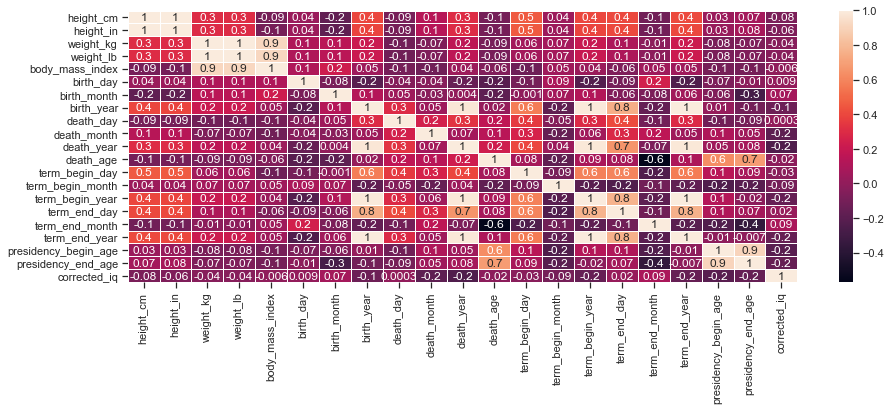

In [85]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.heatmap(data.corr(), annot = True, fmt='.1g', linewidths=.5, ax=ax)

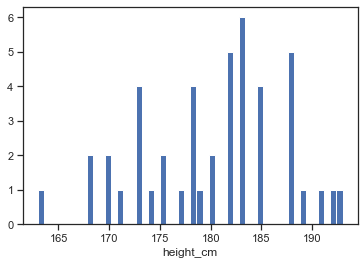

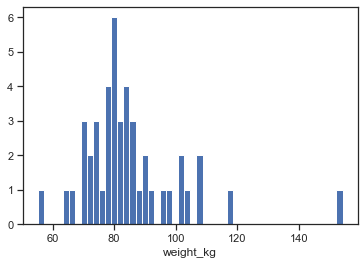

In [102]:
# Гистограмма по признакам
num_col = ['height_cm', 'weight_kg']
for col in num_col:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [103]:
# Масштабирование данных в диапазоне от 0 до 1
sc1 = MinMaxScaler()
for item in num_col:
    data.loc[:,item]=sc1.fit_transform(data[[item]])

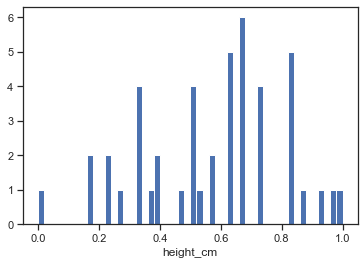

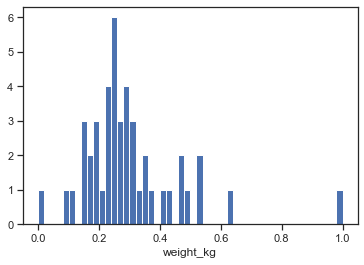

In [104]:
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

In [135]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data_body = le.fit_transform(data['body_mass_index_range'])
Y = pd.DataFrame(data_body)


## Метод опорных векторов

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    data[num_col], Y, test_size=0.2, random_state=1)

data_X_train.shape, data_X_test.shape

((36, 2), (9, 2))

In [160]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

C:\Users\danch\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [161]:
pred_y = svc.predict(X_test)

In [162]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [168]:
print('Accuracy Score: {}\nF1 Score: {}'.format(
    accuracy_score(y_test, y_pred_svc), 
    f1_score(y_test, y_pred_svc, average='micro'),))

Accuracy Score: 0.3333333333333333
F1 Score: 0.3333333333333333


## Случайный лес

In [170]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4)
rf.fit(X_train, y_train)

<ipython-input-170-161fc36e3a72>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=4)

In [171]:

y_pred_rf = rf.predict(X_test)

In [173]:
print('Accuracy Score: {}\nF1 Score: {}'.format(
    accuracy_score(y_test, y_pred_rf), 
    f1_score(y_test, y_pred_rf, average='micro')))

Accuracy Score: 0.6666666666666666
F1 Score: 0.6666666666666666


#### Вывод: модель Случайный лес имеет лучшие показатели